In [9]:
%matplotlib notebook

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Sets defaults for matplotlib figures
plt.rcParams["figure.figsize"] = [10,6] # [width inches , height inches]
plt.rcParams["figure.autolayout"] = True #False by default but needs to be true so the picture doesn't cut off

In [31]:
#Open beer data csv file and turn it into a DataFrame
path = "output_data/craft_beer_nv.csv"
raw_df = pd.read_csv(path)
raw_df.head(5)

,Name,id,Alcohol By Volume,International Bitterness Units,Standard Reference Method,Style,Category,Brewer,City,State,Latitude,Longitude,Region
0,Possession Porter,723,5.6,0,0,Porter,Irish Ale,Diamond Knot Brewery & Alehouse,Mukilteo,Washington,47.9485,-122.3050,West
1,Free Bike Amber,742,4.5,0,0,American-Style Amber/Red Ale,North American Ale,Skagit River Brewing,Mount Vernon,Washington,48.4192,-122.3350,West
2,Potrero ESB,3982,5.2,0,0,Special Bitter or Best Bitter,British Ale,21st Amendment Brewery Cafe,San Francisco,California,37.7825,-122.3930,West
3,Twisted Kilt Scotch Ale,4221,5.0,0,0,Scotch Ale,British Ale,Thirsty Dog Brewing,Akron,Ohio,41.0689,-81.5172,Midwest
4,HarvestÃ¶r Fresh Hop Ale,5243,7.2,0,0,American-Style Pale Ale,North American Ale,Lift Bridge Brewery,Stillwater,Minnesota,45.0565,-92.8222,Midwest


In [33]:
#Get MultiIndex Series by [Region,Category] and the number of rows (beers) per Region and Category
catRegData = raw_df.groupby('Region').Category.value_counts()
catRegData

Region     Category              
Midwest    North American Ale        174
           North American Lager       60
           British Ale                37
           Belgian and French Ale     36
           Other Style                30
           German Lager               28
           Irish Ale                  16
           German Ale                 12
Northeast  North American Ale        291
           Belgian and French Ale     73
           Other Style                71
           German Lager               70
           British Ale                55
           North American Lager       40
           German Ale                 32
           Irish Ale                  31
Southeast  North American Ale         44
           Belgian and French Ale     12
           Irish Ale                   8
           Other Style                 8
           British Ale                 7
           German Lager                4
           German Ale                  2
           North Americ

In [24]:
#Unstack splits a MultiIndex Series into a DataFrame 
crData_df = catRegData.unstack(level=0).drop(columns="Unknown") #Level 0: Region by Category
crData_df2 = catRegData.unstack(level=1).drop(index="Unknown")  #Level 1: Category by Region


In [35]:
#View DataFrame
crData_df

Region,Midwest,Northeast,Southeast,Southwest,West
Category,,,,,
Belgian and French Ale,36.0,73.0,12.0,6.0,60.0
British Ale,37.0,55.0,7.0,7.0,51.0
German Ale,12.0,32.0,2.0,6.0,18.0
German Lager,28.0,70.0,4.0,6.0,45.0
Irish Ale,16.0,31.0,8.0,4.0,41.0
North American Ale,174.0,291.0,44.0,34.0,363.0
North American Lager,60.0,40.0,2.0,14.0,35.0
Other Style,30.0,71.0,8.0,6.0,39.0


<IPython.core.display.Javascript object>


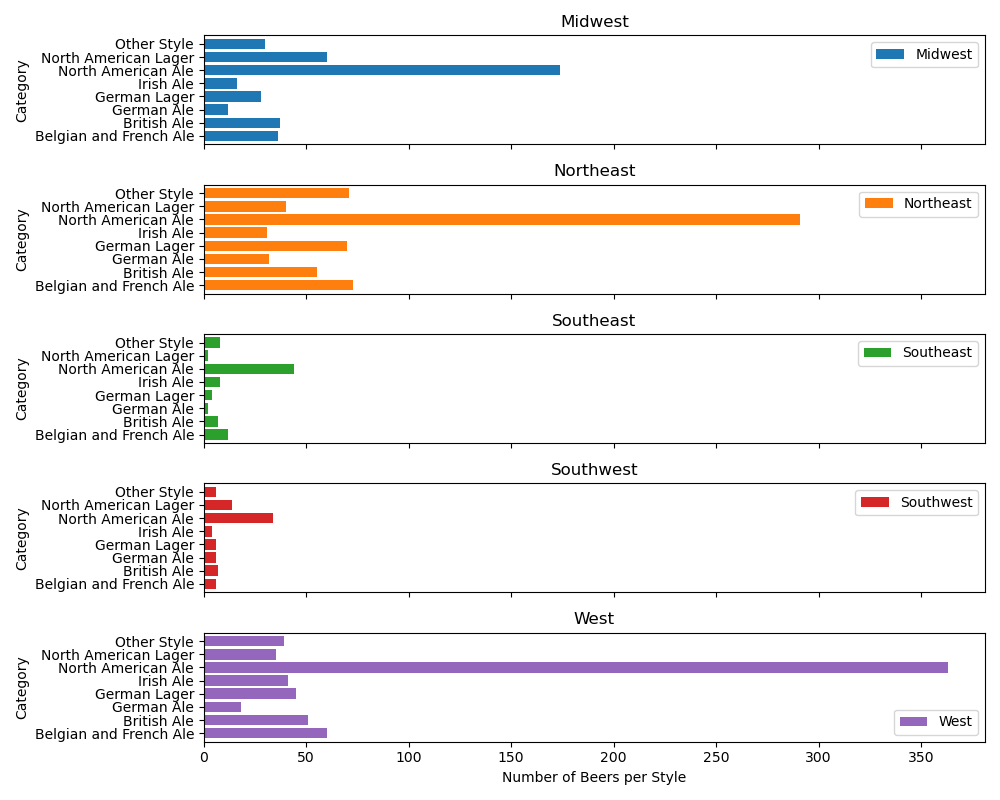

Text(0.5, 0, 'Number of Beers per Style')

In [23]:
#Option 1
crData_df.plot.barh(width=.8,figsize=(10,8),subplots=True) #Had to increase figsize to fit y-axis labels on subplots
plt.ylabel("Category")
plt.xlabel("Number of Beers per Style")

<IPython.core.display.Javascript object>


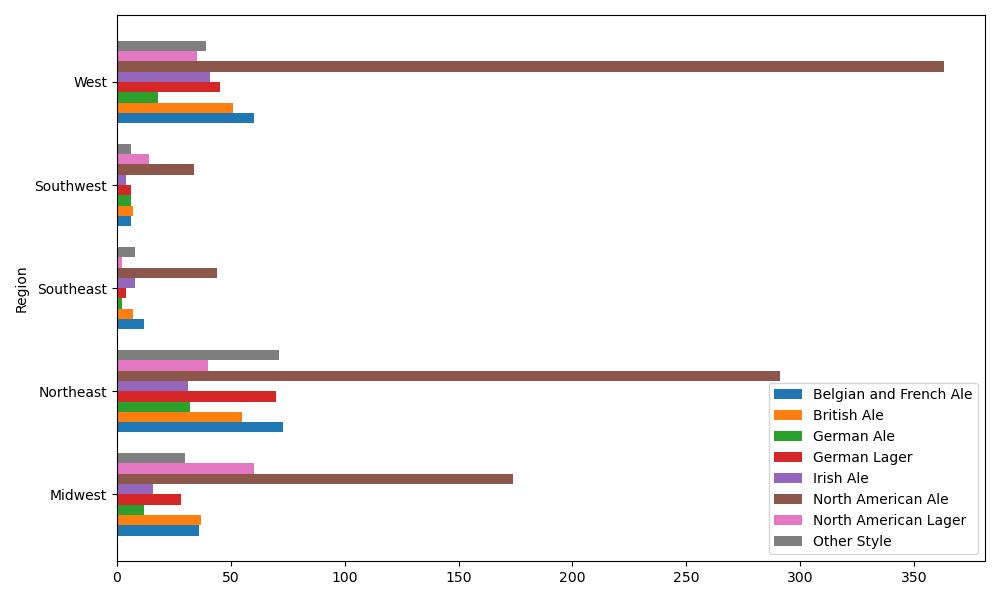

In [37]:
#Option 2 using flipped DataFrame
crData_df2.plot.barh(width=.8)
plt.legend(loc='lower right')